In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import time
import json
import matplotlib.pyplot as plt
import pickle
import cv2
import seaborn as sns

In [3]:
coins_8labels = pickle.load(open('./Output/data/coins_arrays_8label.pkl',"rb"))

In [4]:
coins_cu = coins_8labels[coins_8labels['label'].isin((["1c","2c",'5c']))]

In [5]:
coins_cu['label'].unique()

array(['5c', '2c', '1c'], dtype=object)

In [6]:
coins_cu_dumm = pd.get_dummies(coins_cu['label'])
coins_cu_dumm['gt'] = coins_cu_dumm.apply(lambda x: pd.Series([x.values]), axis=1)
coins_cu_gt=coins_cu.join(coins_cu_dumm)

In [7]:
coins_cu_gt.head()

,image,label,1c,2c,5c,gt
1040,"[[[151, 150, 152], [184, 184, 184], [209, 209,...",5c,0,0,1,"[0, 0, 1]"
1041,"[[[32, 64, 103], [29, 59, 96], [66, 94, 129], ...",5c,0,0,1,"[0, 0, 1]"
1042,"[[[225, 236, 240], [225, 236, 240], [225, 236,...",5c,0,0,1,"[0, 0, 1]"
1043,"[[[215, 225, 228], [222, 228, 233], [225, 231,...",5c,0,0,1,"[0, 0, 1]"
1044,"[[[54, 98, 151], [46, 90, 143], [49, 92, 145],...",5c,0,0,1,"[0, 0, 1]"


In [8]:
img_rows, img_cols, img_channels = 70, 70, 3
input_shape=(img_rows, img_cols, img_channels)
num_classes=3

In [9]:
X = np.stack(coins_cu_gt['image'])/255.0
y = np.stack(coins_cu_gt['gt'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adadelta',
              metrics=['accuracy'])

In [12]:
batch_size = 50
epochs = 10

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 33892 samples, validate on 8473 samples
Epoch 1/10
33892/33892 [==============================] - 480s 14ms/step - loss: 0.4705 - accuracy: 0.7989 - val_loss: 0.1564 - val_accuracy: 0.9380
Epoch 2/10
33892/33892 [==============================] - 480s 14ms/step - loss: 0.1493 - accuracy: 0.9386 - val_loss: 0.0881 - val_accuracy: 0.9644
Epoch 3/10
33892/33892 [==============================] - 463s 14ms/step - loss: 0.0943 - accuracy: 0.9621 - val_loss: 0.0551 - val_accuracy: 0.9782
Epoch 4/10
33892/33892 [==============================] - 429s 13ms/step - loss: 0.0680 - accuracy: 0.9729 - val_loss: 0.0324 - val_accuracy: 0.9882
Epoch 5/10
33892/33892 [==============================] - 444s 13ms/step - loss: 0.0498 - accuracy: 0.9806 - val_loss: 0.0248 - val_accuracy: 0.9913
Epoch 6/10
33892/33892 [==============================] - 446s 13ms/step - loss: 0.0367 - accuracy: 0.9860 - val_loss: 0.0260 - val_accuracy: 0.9895
Epoch 7/10
33892/33892 [==============================] -

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00619712099205899
Test accuracy: 0.997639536857605


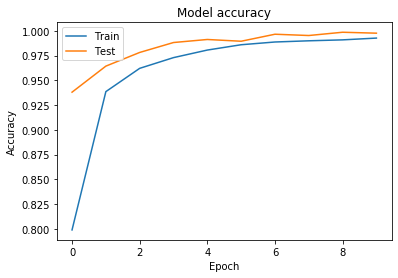

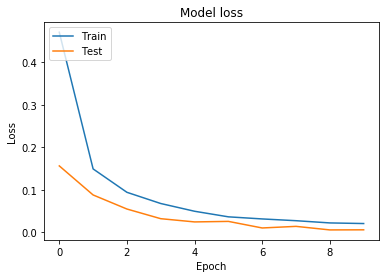

In [14]:

%matplotlib inline
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[0 0 0 ... 2 0 0]
[0 0 0 ... 2 0 0]


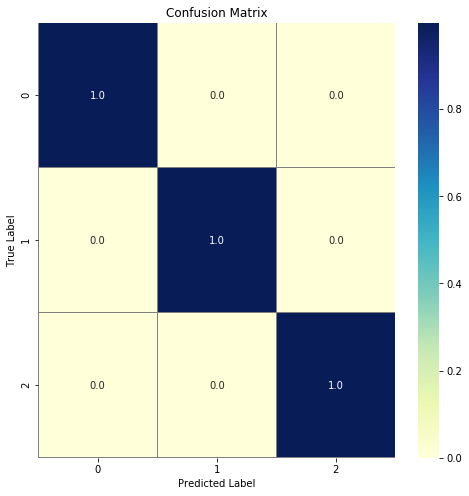

In [17]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
print(Y_pred_classes)
Y_true = np.argmax(y_test,axis = 1)
print(Y_true)
# compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Predicciones reales


In [18]:
from src.predict import whoIamCU

transforming image from new_images/2c1.jpg
transf img shape:  (1, 70, 70, 3)
Prediccion:  [9.9999905e-01 2.4521808e-07 6.8314876e-07]


'Probs -> 1c:1.00000 2c:0.00000 5c:0.00000'

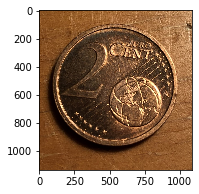

In [19]:
path2 = 'new_images/2c1.jpg'
whoIamCU(path2,model)

transforming image from new_images/1c2.jpg
transf img shape:  (1, 70, 70, 3)
Prediccion:  [0.82282114 0.0344213  0.1427576 ]


'Probs -> 1c:0.82282 2c:0.03442 5c:0.14276'

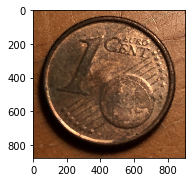

In [21]:
path3 = 'new_images/1c2.jpg'
whoIamCU(path3,model)

transforming image from new_images/5c2.jpg
transf img shape:  (1, 70, 70, 3)
Prediccion:  [0.6925837  0.02018359 0.28723276]


'Probs -> 1c:0.69258 2c:0.02018 5c:0.28723'

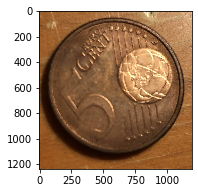

In [22]:
path4 = 'new_images/5c2.jpg'
whoIamCU(path4,model)

transforming image from new_images/5c1.jpg
transf img shape:  (1, 70, 70, 3)
Prediccion:  [1.03281214e-04 9.99896765e-01 3.18376614e-09]


'Probs -> 1c:0.00010 2c:0.99990 5c:0.00000'

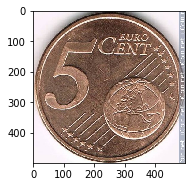

In [23]:
path5 = 'new_images/5c1.jpg'
whoIamCU(path5,model)